In [4]:
import pandas as pd

with open("web_scrape.txt", "r", encoding="utf-8") as rf:
    raw = rf.readlines()
    
df = pd.DataFrame(raw, columns=["text"])
df.to_csv("web_scrape.csv", encoding="utf-8")

In [1]:
from fastai.text import *
from fastai.metrics import *
from fastai.callbacks import *

data = TextLMDataBunch.from_csv("", "web_scrape.csv", bs=50)
data.save("data_export.pkl")

In [2]:
data.show_batch()

idx,text
0,"simply no viable option aside from making salmon a major part of your diet , so you ’d better enjoy it , ” said spokesperson xxmaj marcia xxmaj donner , who explained that it is not enough to simply tolerate eating the fish , as any successful program to trim one ’s waistline requires consuming salmon with such regularity that the dieter has to really love the experience of eating"
1,"and xxmaj nathan xxmaj xxunk told reporters xxmaj monday that they are still no closer to implanting the notion . & ' xxmaj we try almost every night , & ' said a visibly frustrated xxmaj nathan , whose underdeveloped sense of responsibility , coupled with xxmaj beth & 's less - than - fertile imagination , is partly to blame for the xxmaj xxunk & ' current situation ."
2,"knew xxmaj mieritz was the man for the job the instant i started talking . xxmaj he was ready to get on board with every one of my proposed mutual - fund investment initiatives , & ' xxmaj fidelity chairman xxmaj edward xxup c. xxmaj johnson xxup iii said . & ' i thought , & ' xxmaj now , there & 's a man who makes smart decisions without"
3,"and experiences . xxmaj thank you for devoting your love and energy towards making a warehouse into a dreamy wonderland and filling it with amazing works and bodies . ” xxunk xxmaj hunt , xxup mix xxup nyc 2014 xxunk more info about xxup mix xxup nyc ? xxmaj head here . \n xxbos xxup augusta , xxup ga — xxmaj impressed by the technology , xxmaj dan xxmaj"
4,"accommodate all the entrepreneurs and investors in addition to the unavoidable usual suspects who need to be seated around it . xxmaj second , as a sign of its commitment to a solution , the xxmaj israeli authorities should turn on the water supply to xxmaj rawabi .-- xxmaj xxunk xxmaj xxunk is the xxmaj senior xxmaj associate xxmaj dean of international business and finance at xxmaj the xxmaj fletcher"


In [3]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.2, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


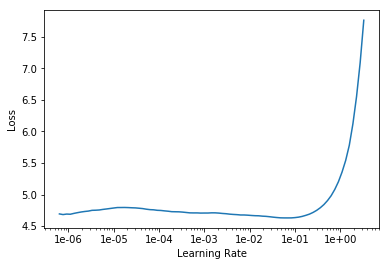

In [4]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,4.176223,4.014181,0.305251,18:45
1,4.172981,4.096310,0.299060,18:48
2,4.165539,4.157921,0.294364,18:48
3,4.135974,4.155229,0.294587,18:48


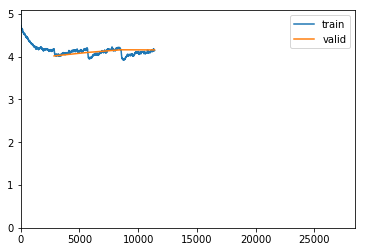

Better model found at epoch 0 with accuracy value: 0.30525094270706177.


KeyboardInterrupt: 

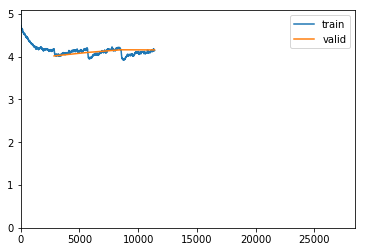

In [5]:
learn.fit_one_cycle(10, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


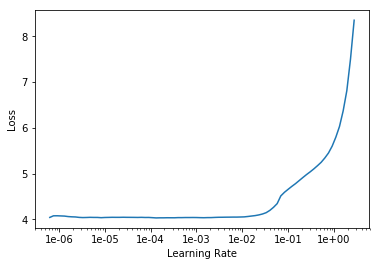

In [6]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.889740,3.856337,0.327216,21:18
1,3.827031,3.799027,0.334598,21:22
2,3.633223,3.749669,0.341490,21:22
3,3.467752,3.729463,0.345186,21:21
4,3.267463,3.742543,0.344315,21:22


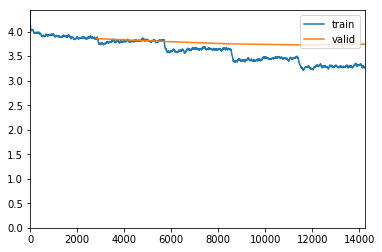

Better model found at epoch 0 with accuracy value: 0.32721588015556335.
Better model found at epoch 1 with accuracy value: 0.3345980644226074.
Better model found at epoch 2 with accuracy value: 0.34149011969566345.
Better model found at epoch 3 with accuracy value: 0.34518560767173767.


In [7]:
learn.fit_one_cycle(5, 1e-3, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

In [8]:
learn.save("learn-stage2")
learn.save_encoder("learn-stage2-enc")

In [10]:
for x in range(3):
    print(learn.predict("The United States has promised to", n_words=30))

The United States has promised to embrace components of the technology and technologies , with profited profits where the profits will help build . Firms that commit companies decades ease the risks of internal division
The United States has promised to bring down the health care socialist from the start as an ultra - conservative version of Hillary Clinton . While these plans contain too much conservatives ,
The United States has promised to ISIS an important " world war " that exactly means it remains a normal one among multiple nations toward the end of the world 's past ventilation discussion on
